# CS 624 Final Project

My problem is a batch problem with a large dataset.

I am using the Students Performance Dataset (https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data)



About Dataset
This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

Table of Contents
Student Information

*   Student ID
* Demographic Details
* Study Habits



1.   Parental Involvement
2.   Extracurricular Activities
3.   Academic Performance
4.   Target Variable: Grade Class






Student Information
* Student ID
StudentID: A unique identifier assigned to each student (1001 to 3392).

Demographic Details
* Age: The age of the students ranges from 15 to 18 years.
* Gender: Gender of the students, where 0 represents Male and 1 represents Female.
* Ethnicity: The ethnicity of the students, coded as follows:
* 0: Caucasian
* 1: African American
* 2: Asian
* 3: Other

ParentalEducation: The education level of the parents, coded as follows:
* 0: None
* 1: High School
* 2: Some College
* 3: Bachelor's
* 4: Higher

Study Habits
* StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement
* ParentalSupport: The level of parental support, coded as follows:
* 0: None
* 1: Low
* 2: Moderate
* 3: High
* 4: Very High

Extracurricular Activities
* Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
* Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
* Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

Academic Performance
* GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

Target Variable: Grade Class
* GradeClass: Classification of students' grades based on GPA:
* 0: 'A' (GPA >= 3.5)
* 1: 'B' (3.0 <= GPA < 3.5)
* 2: 'C' (2.5 <= GPA < 3.0)
* 3: 'D' (2.0 <= GPA < 2.5)
* 4: 'F' (GPA < 2.0)

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split
import plotly

import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.color_palette("crest", as_cmap=True)
sns.set_palette("crest")

# Spark

In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("Decision Tree Model").getOrCreate()

# Load the Dataset

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Student_performance_data _.csv", header="true", inferSchema="true")

# The following command caches the DataFrame in memory. This improves performance since subsequent calls to the DataFrame can read from memory instead of re-reading the data from disk.
df.cache()


DataFrame[StudentID: int, Age: int, Gender: int, Ethnicity: int, ParentalEducation: int, StudyTimeWeekly: double, Absences: int, Tutoring: int, ParentalSupport: int, Extracurricular: int, Sports: int, Music: int, Volunteering: int, GPA: double, GradeClass: double]

In [ ]:
df.printSchema()

df.show()

root
 |-- StudentID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Ethnicity: integer (nullable = true)
 |-- ParentalEducation: integer (nullable = true)
 |-- StudyTimeWeekly: double (nullable = true)
 |-- Absences: integer (nullable = true)
 |-- Tutoring: integer (nullable = true)
 |-- ParentalSupport: integer (nullable = true)
 |-- Extracurricular: integer (nullable = true)
 |-- Sports: integer (nullable = true)
 |-- Music: integer (nullable = true)
 |-- Volunteering: integer (nullable = true)
 |-- GPA: double (nullable = true)
 |-- GradeClass: double (nullable = true)

+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+------------------+----------+
|StudentID|Age|Gender|Ethnicity|ParentalEducation|   StudyTimeWeekly|Absences|Tutoring|ParentalSupport|Extracurricular|Sports|Music|Volunteering|               GPA|GradeClass|
+--------

In [ ]:
print("The dataset has %d rows." % df.count())

The dataset has 2392 rows.


# Preprocessing

In [ ]:
# Preprocessing: StringIndexer for categorical labels
label_indexer = StringIndexer(inputCol="GradeClass", outputCol="label")
data = label_indexer.fit(df).transform(df)

In [ ]:
# Preprocessing: VectorAssembler for feature columns
assembler = VectorAssembler(inputCols=["StudentID", "Age", "Gender", "Ethnicity",
                                       "ParentalEducation", "StudyTimeWeekly", "Absences", "Tutoring",
                                       "ParentalSupport", "Extracurricular", "Sports", "Music",
                                      "Volunteering", "GPA"], outputCol="features")
data = assembler.transform(data)

# Split the data

In [ ]:
# Split the dataset randomly into 70% for training and 30% for testing. Passing a seed for deterministic behavior
train_data, test_data = data.randomSplit([0.7, 0.3], seed=0)

# Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Train

In [ ]:
model = dt_classifier.fit(train_data)

# Predictions

In [ ]:
predictions = model.transform(test_data)

# Evaluate Performance

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.90


In [ ]:
spark.stop()

# Visualizations

In [304]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [305]:
path = "/content/drive/MyDrive/Colab Notebooks/Student_performance_data _.csv"
df = pd.read_csv(path)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [306]:
df.shape

(2392, 15)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [308]:
#check for duplicate
df.duplicated().sum()

0

In [309]:
#check for null values
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


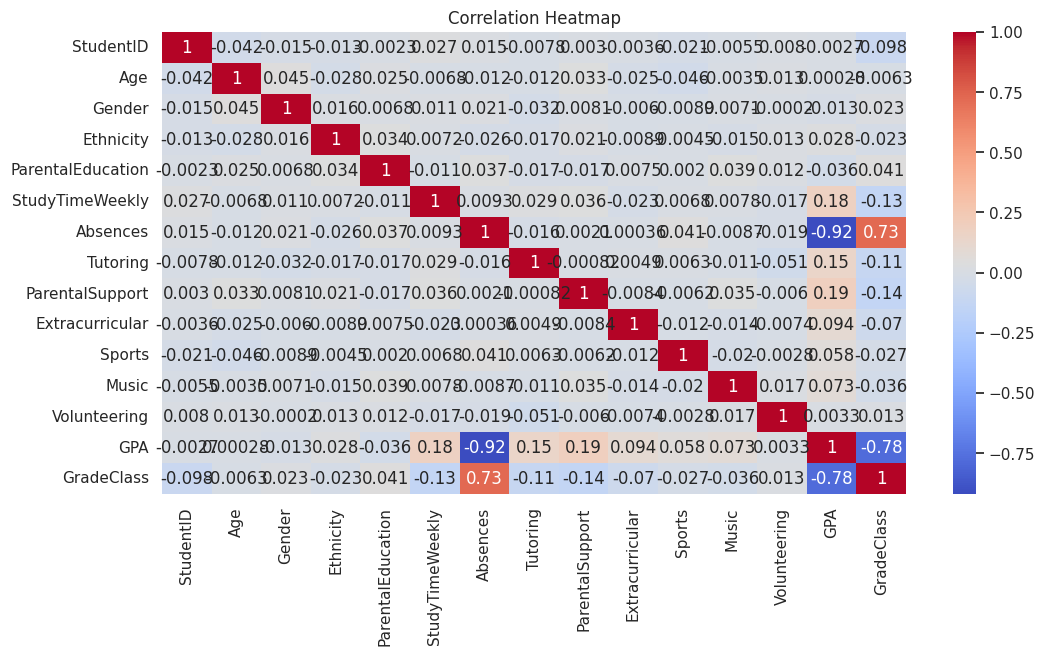

In [312]:
plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['Gender']=df['Gender'].replace({0:'Male',1:"Female"})
df['Ethnicity']=df['Ethnicity'].replace({0:'Caucasian',1:"African American",2:"Asian",3:"Other"})
df['ParentalSupport']=df['ParentalSupport'].replace({0: "None" ,1: "Low" ,2: "Moderate" ,3: "High" ,4: "Very High"})
df['Tutoring']=df['Tutoring'].replace({0:'No',1:'Yes'})
df['Extracurricular']=df['Extracurricular'].replace({0:'no',1:'yes'})
df['Sports']=df['Sports'].replace({0:'no',1:'yes'})
df['Music']=df['Music'].replace({0:'no',1:'yes'})
df['Volunteering']=df['Volunteering'].replace({0:'no',1:'yes'})
df['ParentalEducation']=df['ParentalEducation'].replace({0: "None", 1: "High School", 2: "Some College", 3: "Bachelor", 4: "Higher"})
df['GradeClass']=df['GradeClass'].replace({0: "A", 1: "B", 2: "C", 3: "D", 4: "F"})

# EDA

In [ ]:
data=df['Age'].value_counts().sort_index()
sex=df['Gender'].value_counts().sort_index()

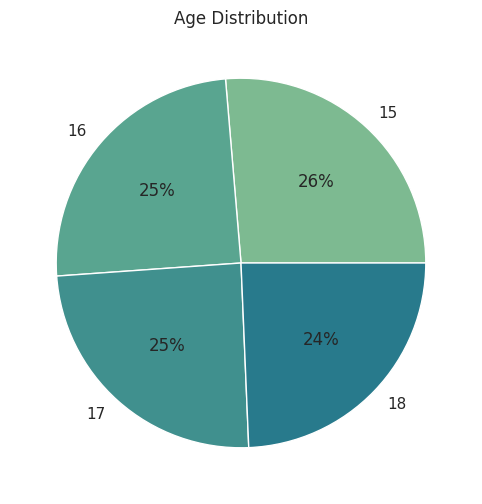

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(data,labels=data.index,autopct='%.0f%%')
plt.title('Age Distribution')
plt.show()

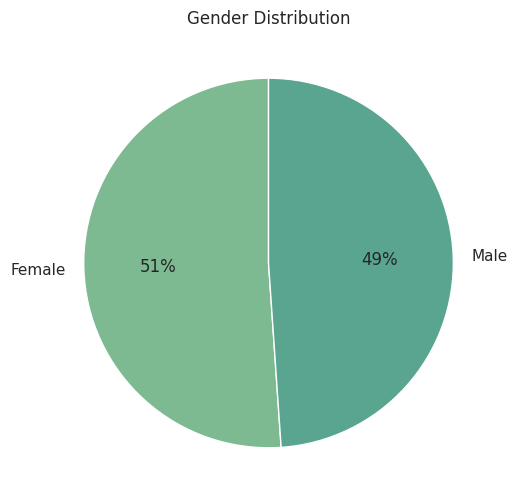

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(sex,labels=sex.index,autopct='%.0f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()


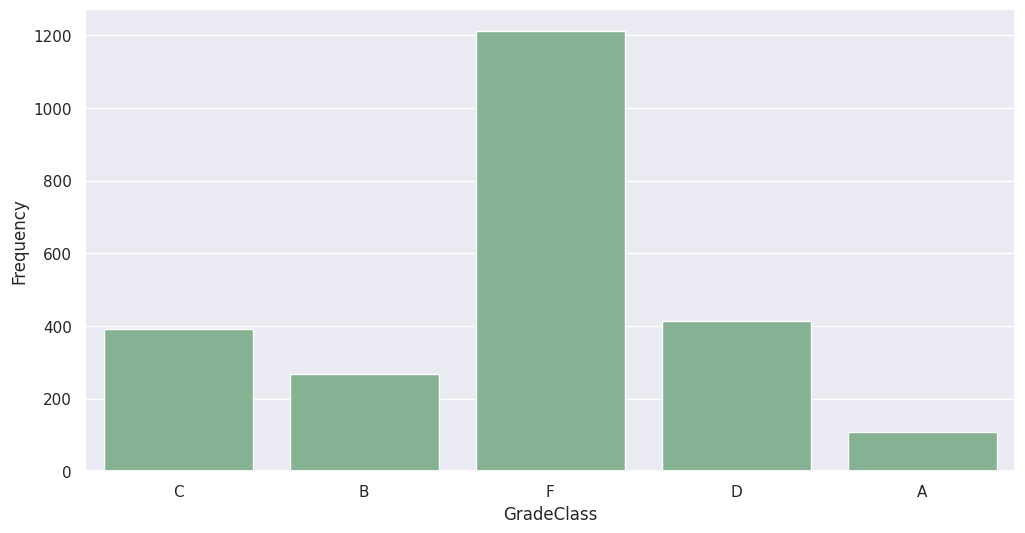

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='GradeClass')
plt.ylabel('Frequency')
plt.show()

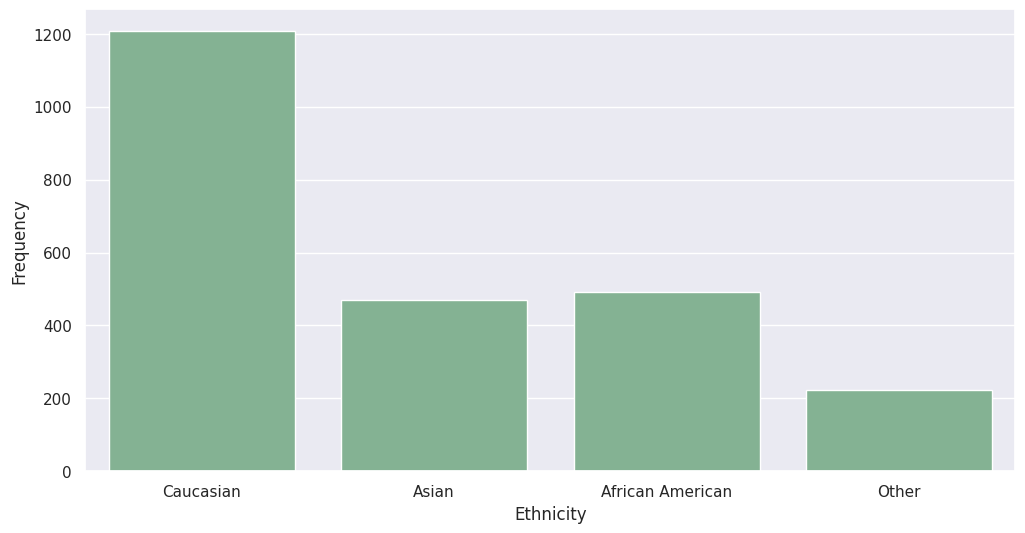

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Ethnicity')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='GradeClass', ylabel='StudyTimeWeekly'>

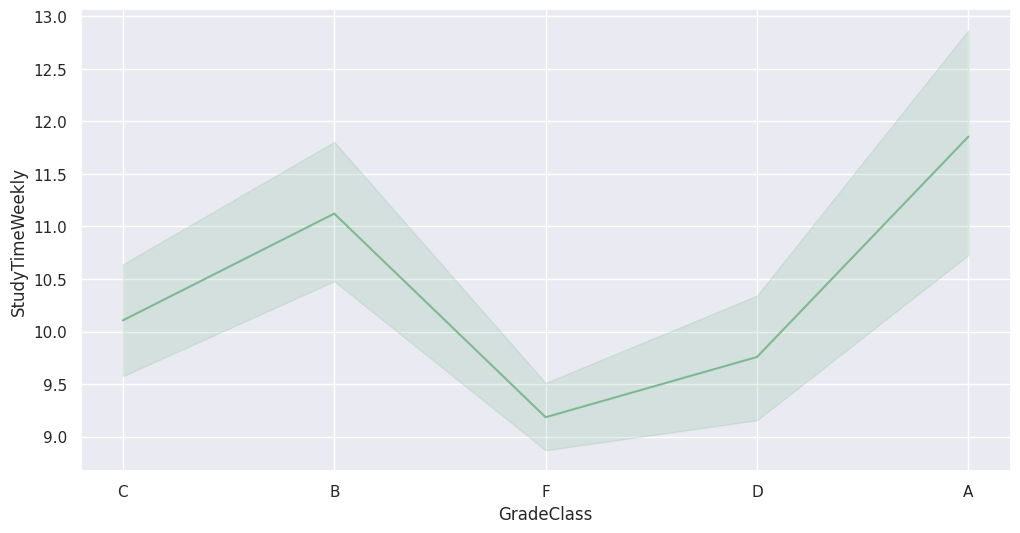

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='StudyTimeWeekly',x='GradeClass')

<Axes: xlabel='GradeClass', ylabel='Absences'>

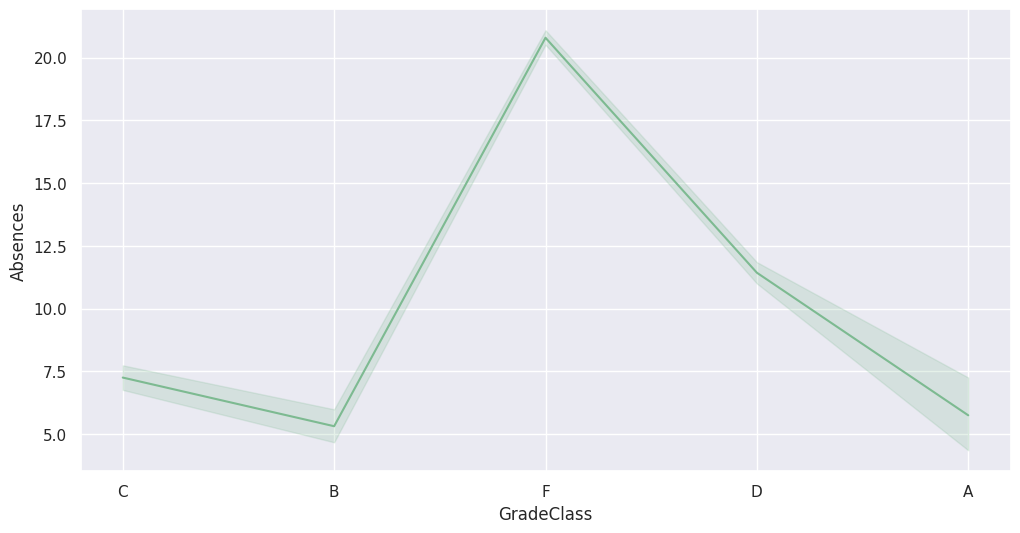

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Absences',x='GradeClass')

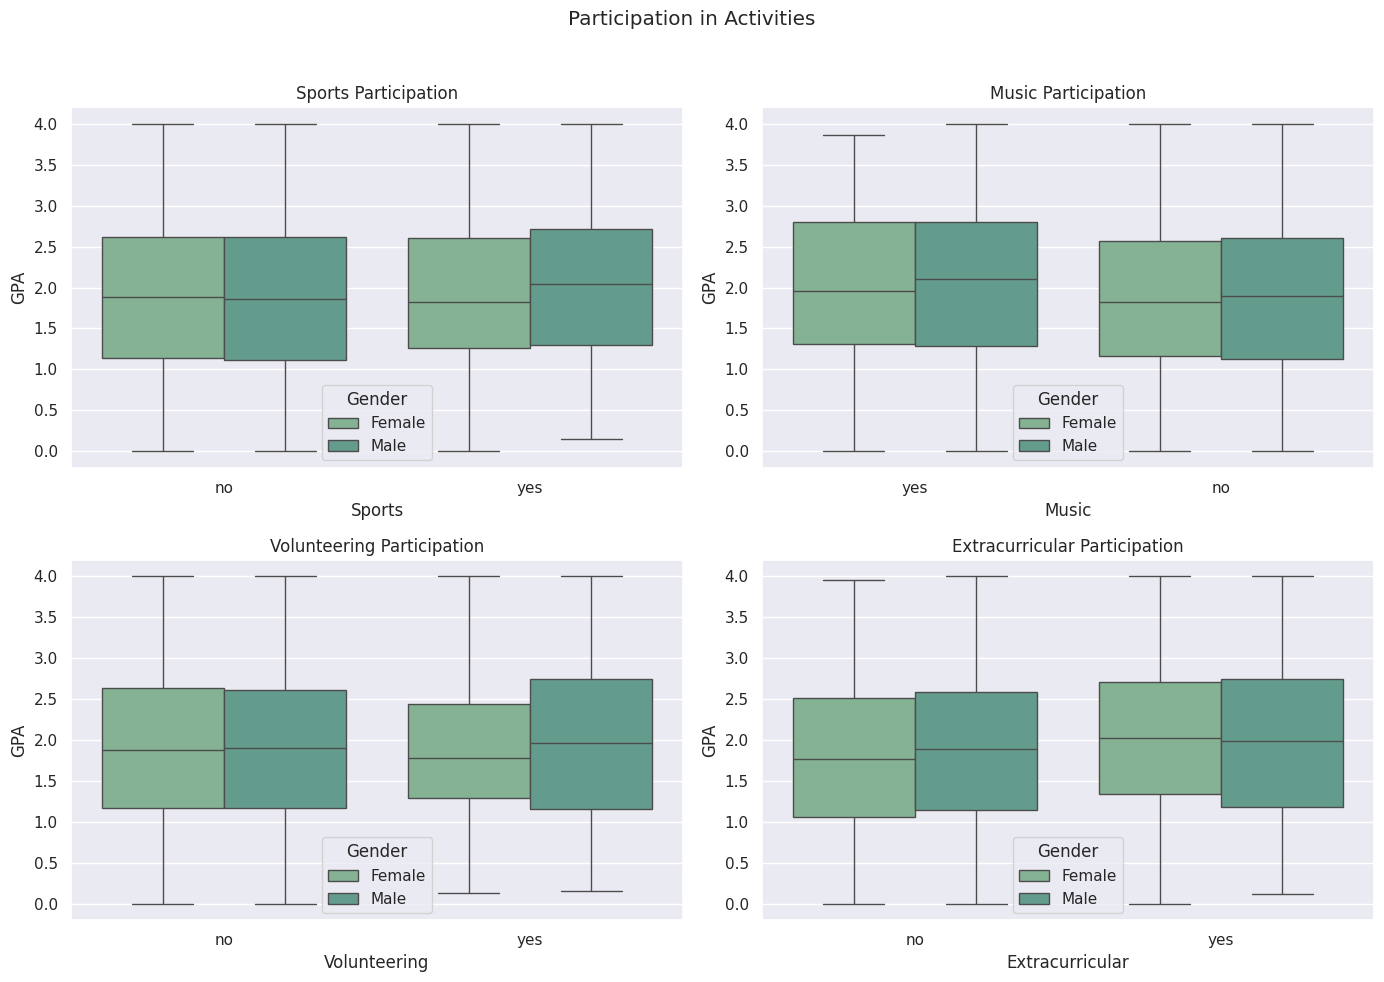

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Participation in Activities')
sns.boxplot(data=df, y='GPA', x='Sports',hue='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Sports Participation')
sns.boxplot(data=df, y='GPA', x='Music',hue='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Music Participation')
sns.boxplot(data=df, y='GPA', x='Volunteering',hue='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Volunteering Participation')
sns.boxplot(data=df, y='GPA', x='Extracurricular', hue='Gender',ax=axes[1, 1])
axes[1, 1].set_title('Extracurricular Participation')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

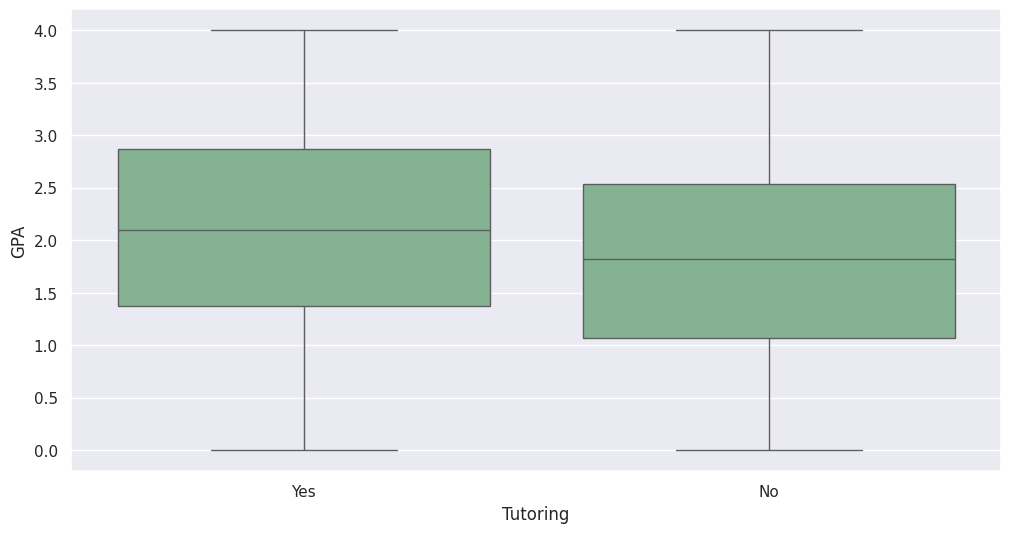

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Tutoring',y='GPA')
plt.show()

# Conclusion

PySpark MLlib library offered a scalable and efficient solution for building and evaluating
 a Decision Tree model for classification.

# Challenges

I used a large dataset, but for ease of use I found a dataset that have mainly numerical values.